In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.random.randn(500, 2)
theta = np.zeros(2)

In [3]:
def loss_function(data, theta):
    m = theta[0]
    b = theta[1]
    loss = 0
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        y_hat = m*x + b
        loss = loss + (y - y_hat)**2
        
    mse = loss / float(len(data))
    return mse

In [4]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        gradients[0] += -(2/N) * x * (y - (m*x + b)) # gradient theo m
        gradients[1] += -(2/N) * (y - (theta[0]*x + b)) # gradient theo b
        
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon) # cộng thêm một epsilon để tránh lỗi chia cho 0
    
    return gradients

In [5]:
def Adam(data, theta, lr=1e-2, beta1=0.9, beta2=0.9, epsilon=1e-6, num_iterations=2000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    loss = []
    
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients**2
        mt_hat = mt / (1. - beta1**(t + 1))
        vt_hat = vt / (1. - beta2**(t + 1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
        loss.append(loss_function(data, theta))
        
    return theta, loss

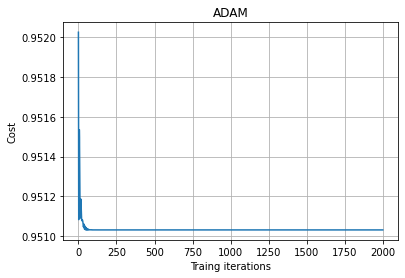

In [6]:
theta, loss = Adam(data, theta)

plt.plot(loss)
plt.grid()
plt.xlabel('Traing iterations')
plt.ylabel('Cost')
plt.title('ADAM')
plt.show()